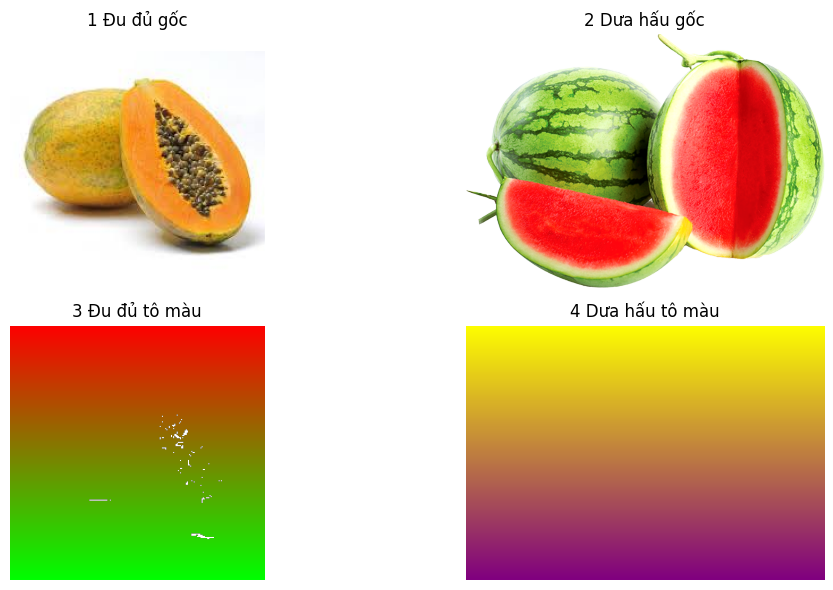

In [1]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt

# Đọc ảnh đu đủ và dưa hấu từ thư mục exercise
papaya = iio.imread("exercise/papaya.jpg")
watermelon = iio.imread("exercise/watermelon.png")

# Hàm tô màu gradient từ start_color đến end_color theo chiều cao ảnh
def apply_gradient_color(img, start_color, end_color):
    h, w, _ = img.shape
    gradient = np.linspace(start_color, end_color, h).reshape(h, 1, 3).astype(np.uint8)
    gradient_img = np.tile(gradient, (1, w, 1))

    # Tạo mặt nạ alpha: giữ lại pixel có độ sáng trung bình > 30
    alpha = (img.mean(axis=2, keepdims=True) > 30).astype(np.uint8) * 255

    result_rgb = np.where(alpha == 255, gradient_img, 0)
    result = np.dstack([result_rgb, alpha.squeeze()])  # Kết hợp RGB + Alpha
    return result

# Tô màu đu đủ: đỏ → xanh lá
papaya_colored = apply_gradient_color(papaya, [255, 0, 0], [0, 255, 0])

# Tô màu dưa hấu: vàng → tím
watermelon_colored = apply_gradient_color(watermelon, [255, 255, 0], [128, 0, 128])

# Tạo ảnh nền trong suốt để ghép
H = max(papaya_colored.shape[0], watermelon_colored.shape[0])
W = papaya_colored.shape[1] + watermelon_colored.shape[1] + 50  # chừa khoảng giữa
background = np.zeros((H, W, 4), dtype=np.uint8)

# Ghép ảnh đu đủ bên trái
background[:papaya_colored.shape[0], :papaya_colored.shape[1]] = papaya_colored

# Ghép ảnh dưa hấu bên phải
x_offset = W - watermelon_colored.shape[1]
background[:watermelon_colored.shape[0], x_offset:] = watermelon_colored

# Lưu ảnh kết quả
iio.imsave("exercise/papaya_watermelon.png", background)

# So sánh từng bước
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.imshow(papaya)
plt.title("1️ Đu đủ gốc")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(watermelon)
plt.title("2️ Dưa hấu gốc")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(papaya_colored)
plt.title("3️ Đu đủ tô màu")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(watermelon_colored)
plt.title("4️ Dưa hấu tô màu")
plt.axis('off')

plt.tight_layout()
plt.show()
